# AP1 - Manipulation de données électrophysiologiques dans MNE-Python
Ce tutoriel est traduit et adapté de [ceux de Dr. Jas](https://jasmainak.github.io/mne-workshop-brown/readme.html). N'hésitez pas à les consulter pour aller plus loin. Les tutoriels disponibles dans la [documentation de MNE-Python](https://mne.tools/stable/auto_tutorials/index.html) sont également une excellente ressource.

## Introduction à l'activité
À travers ces 4 activités pratiques, vous apprendrez à utiliser des outils de programmation pour traiter et analyser des données électrophysiologiques. À la fin de ces tutoriels, vous aurez exploré, nettoyé et analysé des données d'entraînement en utilisant différentes approches couramment utilisées en neurosciences cognitives.  
Le premier de ces outils est [MNE-Python](https://mne.tools/stable/index.html), une bibliothèque permettant la manipulation de jeux de données électrophysiologiques, incluant la MEG, l'EEG, l'EEG intracrânien et la polysomnographie (une combinaison d'EEG, d'ECG et d'EMG).

MNE-Python est un outil polyvalent pour le traitement de données cérébrales.

![eeg_swissknife](https://i.ibb.co/y0Rnw9T/eeg-swissknfife.png)

Au cours du traitement, les données prennent différentes formes, des données brutes (*raw*), des segments (*epochs*), des potentiels évoqués (*evoked potentials*), des cartes temps-fréquence, et d'autres encore.
Les objets de MNE-Python permettent d'associer les données sous différentes formes à leurs métadonnées, c'est-à-dire aux informations complémentaires à l'enregistrement qui facilitent leur lecture. Chaque objet possède des [méthodes](https://docs.python.org/3/tutorial/classes.html#method-objects) qui lui sont propres, c'est-à-dire des fonctions qui s'appliquent sur ces objets pour les transformer ou pour tracer des graphiques afin de les explorer.

Au cours de cette première activité, nous allons donc découvrir comment les données M/EEG sont couramment stockées et manipulées par MNE-Python, ainsi que comment nous pouvons les explorer de manière sommaire.

Maintenant, importons MNE. Pour ce tutoriel, nous importerons l'intégralité de la bibliothèque et utiliserons les noms des fonctions dans leur intégralité afin de rendre explicites les différents modules de MNE.


In [2]:
import os
import mne
import matplotlib.pyplot as plt

# Pour activer les graphiques interactifs, remplacez "%matplotlib inline" par "%matplotlib qt".
%matplotlib inline

## Charger les données

Différents formats de fichiers existent pour stocker les données électrophysiologiques. Ils peuvent être reconnus à leur extension, c'est-à-dire à la suite de caractères qui succède au point dans le nom du fichier. Chaque format a une manière différente de représenter les données et leurs métadonnées, mais la plupart du temps, le fichier est composé d'un *en-tête* (contenant les métadonnées) et d'un *corps*, contenant les données elles-mêmes (par exemple, les signaux mesurés sur les différents capteurs, le plus souvent accompagnés d'un canal encodant les événements liés à l'expérience).  
Certains formats sont plus courants que d'autres, certains sont libres, d'autres sont propriétaires, mais tous ont leurs avantages et inconvénients. En général, chaque fabricant de M/EEG a son propre format, mais heureusement, MNE-Python a les moyens de lire la plupart d'entre eux. Quelques-uns des plus courants sont :

- EDF ou EDF+ (.edf) : [European Data Format(+)](https://www.edfplus.info/index.html). Format open source assez standard et polyvalent. Permet d'encoder des données EEG et MEG, et même EKG/EMG dans sa version étendue (+).
- FIF (.fif) : ?. Alternative au format EDF avec à peu près les mêmes avantages, c'est le plus utilisé par MNE-Python. 
- SET (.set) : Format propre à [EEGLAB](https://sccn.ucsd.edu/eeglab/index.php), une autre bibliothèque d'analyse M/EEG qui fonctionne sous Matlab.
- CTF, CNT, BDF etc... : Autres formats. Notre conseil serait que vous transformiez vos données en l'un des formats ci-dessus (FIF ou EDF), et que vous vous éloigniez dès que possible de ces formats propriétaires démoniaques.

Dans notre exemple, les données sont au format FIF. Nous utiliserons donc la fonction [mne.io.read_raw_fif](https://mne.tools/stable/generated/mne.io.read_raw_fif.html#mne.io.read_raw_fif). Prenez un moment pour consulter sa documentation. D'autres fonctions sont disponibles [ici](https://mne.tools/stable/reading_raw_data.html) pour lire les autres formats.

En chargeant les données, un objet [Raw](https://mne.tools/stable/generated/mne.io.Raw.html) de la bibliothèque MNE-Python sera créé.

In [3]:
# Crée un chemin d'accès vers le jeu de données du tutoriel. 
# Ce jeu de données sera téléchargé automatiquement lors du premier appel du fichier.
chemin_donnees = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis_raw.fif')

# Charge les données et crée un objet mne.io.Raw()
raw = mne.io.read_raw_fif(chemin_donnees, preload=True) 
# L'option preload=False permet d'économiser de la mémoire lorsque le chargement immédiat des données n'est pas nécessaire, mais seulement l'accès aux métadonnées

Opening raw data file /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


## Sauvgarder les données

N'importe quel objet de données de MNE-Python peut être sauvegardé en utilisant la méthode [.save()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=save#mne.io.Raw.save). Essayons avec notre objet Raw.  
L'attribut "overwrite" permet de forcer l'enregistrement des données même si le fichier existe déjà. Il est recommandé de l'utiliser avec précaution.

In [4]:
data_path = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis_raw.fif')
raw.save(data_path, overwrite=True)

Overwriting existing file.
Writing /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif
Closing /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif
[done]


## Objet mne.io.[Raw](https://mne.tools/stable/generated/mne.io.Raw.html)

Les objets Raw contiennent des données continues, c'est-à-dire non segmentées. Ils se composent d'une [structure d'information](https://mne.tools/stable/generated/mne.Info.html) et d'un [tableau numpy](https://numpy.org/doc/stable/reference/generated/numpy.array.html) contenant les données.   
Lorsque vous appelez un objet raw sans spécifier de méthode, sa structure d'information est affichée. Il s'agit des métadonnées du fichier. Vous y trouverez diverses informations utiles pour la suite du processus, telles que la fréquence d'échantillonnage, le nombre et le type de canaux, ainsi que la présence de filtres matériels pendant l'enregistrement, etc.


In [5]:
raw # Équivalent à raw.info

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MB, data loaded>

Il est également possible d'accéder aux métadonnées en les appelant directement via le [dictionnaire](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) raw.info ou à travers les [attributs](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) de l'objet Raw.

In [6]:
# Affichez la fréquence d'échantillonnage
print(f"Fréquence d'échantillonnage : {raw.info['sfreq']} Hz")
# Affichez la taille de la matrice de données
print(f'{len(raw.ch_names)} canaux x {len(raw.times)} échantillons')

Fréquence d'échantillonnage : 600.614990234375 Hz
376 canaux x 166800 échantillons


In [ ]:
## Question 1: Quelle est la durée totale de l'enregistrement en secondes?
print(f"Durée totale de l'enregistrement : {ADD CODE HERE:.2f} secondes")
## Question 2: Quelles sont les fréquences de filtrage des données?
print(f"Fréquence de coupure haute des données : {ADD CODE HERE:.2f} Hz")
print(f"Fréquence de coupure basse des données : {ADD CODE HERE:.2f} Hz")

De manière similaire, vous pouvez accéder au tableau contenant les données.

In [7]:
raw.get_data()

array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
        -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
       [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
        -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
       [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
        -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
       ...,
       [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
         6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
       [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
         8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
       [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
         2.64089357e-04,  2.62781984e-04,  2.57552492e-04]])

Il est également possible d'indexer directement les données de l'objet Raw, de la même manière qu'un array. Cela peut permettre, par exemple, de sélectionner une portion spécifique des données.

In [8]:
# Extrait les données des 5 premiers canaux, de 1 seconde à 3 secondes.
sfreq = raw.info['sfreq']
start_secondes = 1  # Début de la période en secondes
end_secondes = 3  # Fin de la période en secondes

# Calcule les indices correspondant à la période spécifiée
start_indices = int(sfreq * start_secondes)
end_indices = int(sfreq * end_secondes)

# Calcule les indices correspndant aux 5 premiers canaux
start_sensor = 0
end_sensor = 5

# Extrait les données et les temps correspondants
data, times = raw[start_sensor:end_sensor, start_indices:end_indices]

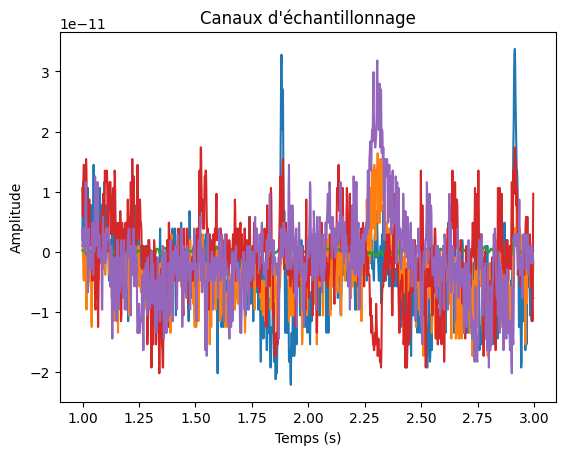

In [9]:
# Cette partie du code trace les données des 5 premiers canaux pour la plage horaire spécifiée.
_ = plt.plot(times, data.T)
_ = plt.title('Canaux d\'échantillonnage')
_ = plt.xlabel('Temps (s)')
_ = plt.ylabel('Amplitude')
plt.show()


In [ ]:
#Question 3: Extrait les données des canaux 5 jusqu'à 10, de 2 seconde à 4.5 secondes.
ADD CODE HERE

En général, il est préférable de sélectionner les données en utilisant les méthodes disponibles. Étant donné que ces fonctions modifient l'objet Raw, il est judicieux de les appliquer à une copie de celui-ci si l'on souhaite préserver l'intégrité de notre objet original. Pour ce faire, on utilise la méthode .copy().
Par exemple :

In [10]:
meg_only = raw.copy().pick_types(meg=True, eeg=False)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


Ces fonctions sont plus flexibles et facilitent la manipulation des données. Par exemple, [Raw.pick_types()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20pick_types#mne.io.Raw.pick_types) permet de sélectionner uniquement certains types de capteurs MEG si on les spécifie sous forme de chaînes de caractères.

In [11]:
grad_only = raw.copy().pick_types(meg='grad') # grad est un type de capteur MEG

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


Il est également possible de spécifier les noms des canaux directement. Ces noms se trouvent généralement dans l'attribut raw.ch_names.

In [12]:
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']
specific_chans = raw.copy().pick_channels(pick_chans)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<Raw | sample_audvis_raw.fif, 305 x 166800 (277.7 s), ~391.3 MB, data loaded>
<Raw | sample_audvis_raw.fif, 203 x 166800 (277.7 s), ~261.4 MB, data loaded>
<Raw | sample_audvis_raw.fif, 4 x 166800 (277.7 s), ~8.0 MB, data loaded>


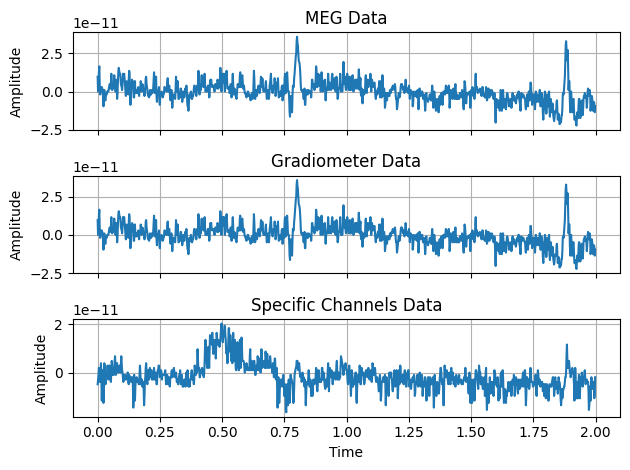

In [13]:
print(meg_only)
print(grad_only)
print(specific_chans)

meg, times_meg = meg_only[:, :int(sfreq * 2)]
grad, times_grad = grad_only[:, :int(sfreq * 2)]
spec, times_spec = specific_chans[:, :int(sfreq * 2)]

# Crée un tracé basique avec matplotlib
f, (a1, a2, a3) = plt.subplots(3, 1, sharex=True)

# Plot pour meg_only
a1.plot(times_meg, meg[0])
a1.set_ylabel('Amplitude')
a1.set_title('MEG Data')
a1.grid(True)

# Plot pour grad_only
a2.plot(times_grad, grad[0])
a2.set_ylabel('Amplitude')
a2.set_title('Gradiometer Data')
a2.grid(True)

# Plot pour specific_chans
a3.plot(times_spec, spec[0])
a3.set_xlabel('Time')
a3.set_ylabel('Amplitude')
a3.set_title('Specific Channels Data')
a3.grid(True)

plt.tight_layout()  # Pour s'assurer que les titres et les étiquettes ne se chevauchent pas
plt.show()

Après toutes ces opérations de copie, libérons un peu de mémoire0

In [14]:
del meg, meg_only, grad_only, data, specific_chans, spec, grad, times_meg, times_grad, times_spec

In [ ]:
#Question 4: Créez un tracé similaire pour les canaux EEG seulement et pour canaux EEG: EEG 001, EEG 002, EEG 003, EEG 004.
pick_chans = ADD CODE HERE
eeg_only = ADD CODE HERE
specific_chans = ADD CODE HERE

print(eeg_only)
print(specific_chans)

eeg, times_eeg = ADD CODE HERE
spec, times_spec = ADD CODE HERE

# Crée un tracé basique avec matplotlib
f, (a1, a2) = plt.subplots(2, 1, sharex=True)
a1.plot(ADD CODE HERE)
a1.set_xlabel('Time')
a1.set_ylabel('Amplitude')
a1.set_title('EEG Data')
a1.grid(True)

a2.plot(ADD CODE HERE)
a2.set_xlabel('Time')
a2.set_ylabel('Amplitude')
a2.set_title('Specific Channels Data')
a2.grid(True)

plt.tight_layout()  # Pour s'assurer que les titres et les étiquettes ne se chevauchent pas

Vous pouvez aussi utiliser une méthode pour sélectionner un segment de données. Avec cette fonction, vous pouvez directement spécifier les bornes du segment en secondes.

In [15]:
# Recadrer les données brutes de 0 à 50 secondes
raw = raw.crop(0, 50)  # en secondes

# Afficher la nouvelle plage de temps
print(f'Nouvelle plage de temps : {raw.times.min():.2f}s à {raw.times.max():.2f}s')

Nouvelle plage de temps : 0.00s à 50.00s


In [16]:
# Pour supprimer un canal spécifique.
nchan = raw.info['nchan']
raw = raw.drop_channels(['MEG 0241', 'EEG 001'])
print(f'Nombre de canaux réduit de {nchan} à {raw.info["nchan"]}')

Nombre de canaux réduit de 376 à 374


Il est possible de "re-coller" plusieurs portions de signal entre elles. Il suffit que leurs métadonnées soient compatibles. Cela peut être utile si l'on veut retirer une partie du signal inutile pour l'analyse (par exemple des artefacts). 

In [17]:
# Créez plusieurs objets Raw
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 40)

# Concaténer dans le temps (fonctionne également sans préchargement)
raw1.append([raw2, raw3])
print(f"La plage de temps s'étend de {raw1.times.min():.2f}s à {raw1.times.max():.2f}s")

La plage de temps s'étend de 0.00s à 40.00s


Enfin, plusieurs méthodes permettent de visualiser les données. La plus basique est la fonction [Raw.plot()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20plot#mne.io.Raw.plot) (rappel : allez jeter un œil à la documentation, il y a beaucoup de paramètres utiles !). Elle permet de créer un tracé des données qui peut être interactif si vous avez activé le bon [*backend* de matplotlib](https://matplotlib.org/1.5.1/faq/usage_faq.html#what-is-a-backend) au début du notebook.

Cette fonction est très puissante. Quelques choses à savoir :
- Les canaux MEG sont affichés en bleu, les canaux EEG sont en noir.
- Les canaux marqués comme *bad* sont en gris et peuvent être vus sur la barre de défilement verticale.
- En cliquant sur les canaux, vous pouvez les marquer comme *bad* de manière interactive.
- Les touches +/- permettent d'ajuster l'échelle des données.
- Les paramètres d'échelle initiaux peuvent être ajustés dans les paramètres de la fonction.
- Si vous ne connaissez pas l'échelle de votre signal, laissez les paramètres par défaut ou essayez `scalings='auto'`.
- Avec les touches *pageup/pagedown* et *home/end*, vous pouvez ajuster la quantité de données affichées.


Using matplotlib as 2D backend.


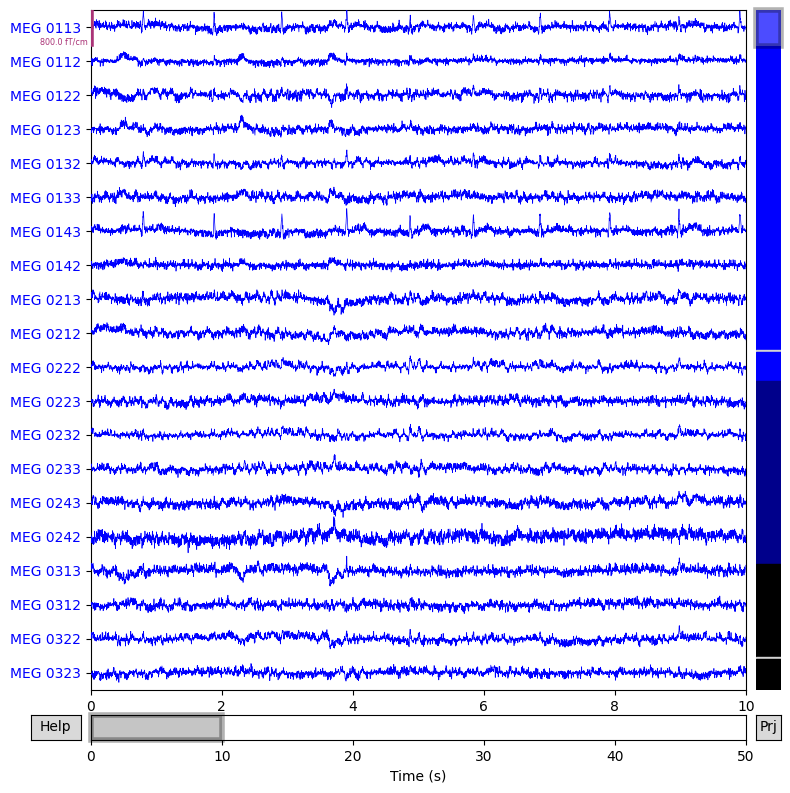

In [18]:
raw.plot();

 Il est également possible de tracer le spectre du signal avec la fonction [Raw.plot_psd()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20plot_psd#mne.io.Raw.plot_psd). C'est utile afin d'inspecter :
- Le bruit de la ligne électrique
- La présence de canaux bruités
- Les canaux encodant les mouvements de la tête
- Si les données ont été traitées (par exemple, filtrées)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)


Text(0.5, 1.0, 'Spectre de Puissance des Capteurs MEG de Type "Mag"')

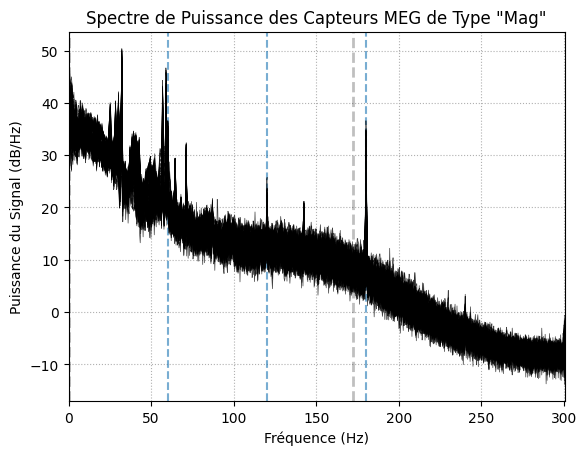

In [19]:
# Créez une figure et un axe pour le tracé du spectre de puissance
fig, ax = plt.subplots(1, 1)

# Copiez les données brutes et sélectionnez uniquement les capteurs MEG de type 'mag' pour le tracé du spectre
raw.copy().pick_types(meg='mag').plot_psd(spatial_colors=False, show=False,
                                          ax=ax);

# Ajoutez des lignes verticales pour indiquer les fréquences de 60 Hz, 120 Hz et 180 Hz
for freq in [60., 120., 180.]:
    ax.axvline(freq, linestyle='--', alpha=0.6)

# Ajoutez des descriptions en français
ax.set_xlabel('Fréquence (Hz)')
ax.set_ylabel('Puissance du Signal (dB/Hz)')
ax.set_title('Spectre de Puissance des Capteurs MEG de Type "Mag"')

Enfin, il est possible de sauvegarder les données à l'aide de la méthode [Raw.save()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20save#mne.io.Raw.save).


In [20]:
new_data_path = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis_raw_processed.fif')
raw.save(new_data_path, overwrite=True)

Overwriting existing file.
Writing /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw_processed.fif
Closing /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw_processed.fif
[done]


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_6117/3276745429.py:2: RuntimeWarning: This filename (/Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_data_path, overwrite=True)


## Objet [mne.Epoch](https://mne.tools/stable/generated/mne.Epochs.html)
Parfois, les données sont segmentées, on les appelle alors des "epochs". L'objet [mne.Epoch](https://mne.tools/stable/generated/mne.Epochs.html), tout comme l'objet Raw, est accompagné d'une structure d'information permettant de comprendre son contenu. Lorsqu'on ouvre un fichier .fif contenant des epochs avec [mne.read_epochs()](https://mne.tools/stable/generated/mne.read_epochs.html?highlight=read_epochs#mne.read_epochs), un objet Epoch est automatiquement créé.

In [21]:
kiloword_data_file = os.path.join(mne.datasets.kiloword.data_path(), 'kword_metadata-epo.fif')
epochs = mne.read_epochs(kiloword_data_file)

Reading /Users/hamzaabdelhedi/mne_data/MNE-kiloword-data/kword_metadata-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     920.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
960 matching events found
No baseline correction applied
0 projection items activated


Ici, nous utilisons le jeu de données "kiloword", car il a déjà été segmenté. Ce jeu de données a été enregistré lors d'une expérience auditive dans laquelle plusieurs mots ont été présentés à un sujet, tels que les mots "acide", "film", "froid", etc.

In [ ]:
# Question 5: Affichez les informations sur les epochs.
ADD CODE HERE

In [ ]:
# Question 6: Affichez la fréquence d'échantillonnage des epochs.
print(f"Fréquence d'échantillonnage : {ADD CODE HERE:.2f} Hz")
# Question 7: Affichez la taille de la matrice de données des epochs.
print(f'{ADD CODE HERE} canaux x {ADD CODE HERE} échantillons')
# Question 8: Quelle est la durée totale de l'enregistrement en secondes?
print(f"Durée totale de l'enregistrement : {ADD CODE HERE:.2f} secondes")
# Question 9: Quelles sont les fréquences de filtrage des données?
print(f"Fréquence de coupure haute des données : {ADD CODE HERE:.2f} Hz")
print(f"Fréquence de coupure basse des données : {ADD CODE HERE:.2f} Hz")

De la même manière, il est possible de créer facilement un graphique interactif ou un spectre moyen à travers les epochs.

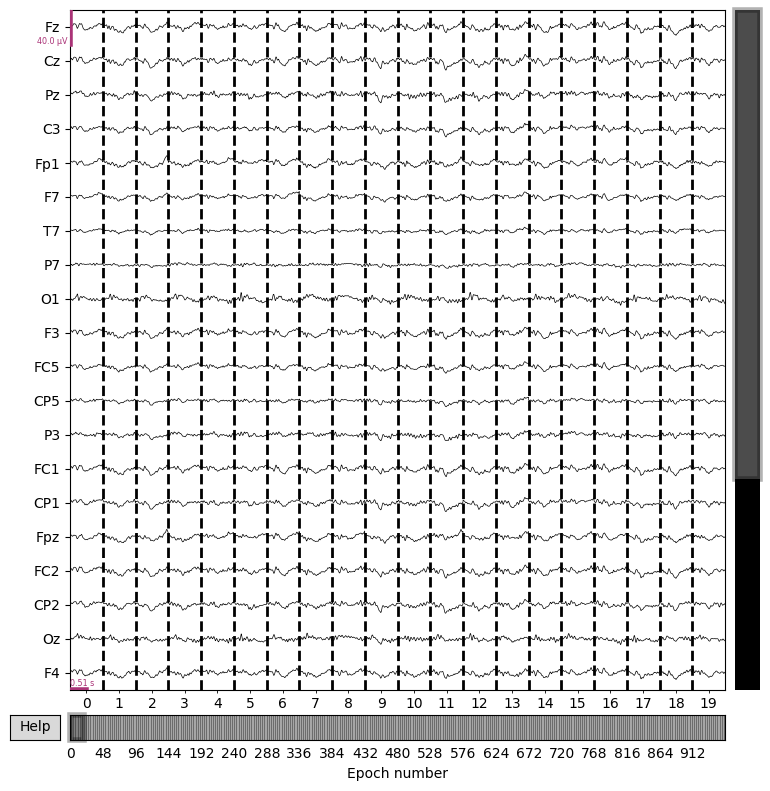

In [22]:
epochs.plot(events=False);

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/opt/homebrew/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


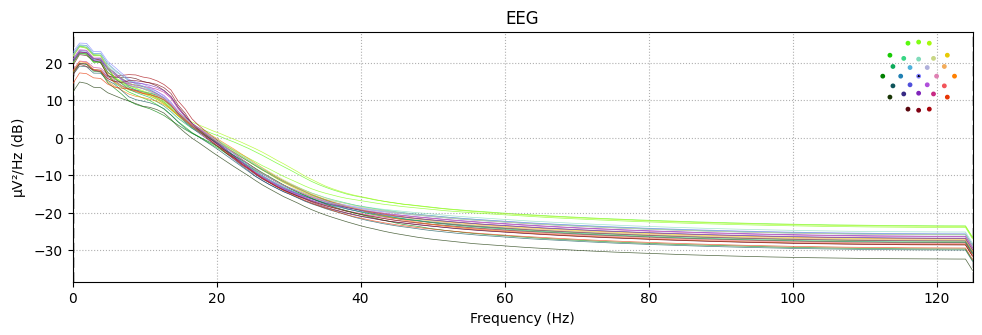

In [23]:
epochs.compute_psd().plot();

Il est possible d'indexer les epochs individuellement ou en passant une liste à l'objet Epochs :

In [24]:
epochs[0]

Number of events,1
Events,film: 1
Time range,-0.100 – 0.920 s
Baseline,off


In [25]:
epochs[[0,1,2,3,4]] # Équivalent à epochs[:5]

Number of events,5
Events,cent: 1cold: 1film: 1main: 1shot: 1
Time range,-0.100 – 0.920 s
Baseline,off


Mais la véritable puissance des objets Epochs réside dans leur capacité à manipuler les epochs basées sur des métadonnées. Dans ce jeu de données, différents mots ont été présentés au sujet. Chaque mot est associé à une epoch, et on peut y accéder en spécifiant le mot qui nous intéresse à l'objet Epochs. Cela fonctionne également avec des conditions expérimentales, ce qui est donc très efficace pour séparer ses données avant de les comparer.

In [26]:
epochs['acid']

Number of events,1
Events,acid: 1
Time range,-0.100 – 0.920 s
Baseline,off


In [27]:
print(epochs['acid'].info)

<Info | 9 non-empty values
 bads: []
 ch_names: Fz, Cz, Pz, C3, Fp1, F7, T7, P7, O1, F3, FC5, CP5, P3, FC1, CP1, ...
 chs: 29 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 1970-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 29
 projs: []
 sfreq: 250.0 Hz
>


In [ ]:
# Question 10: Affichez les informations sur les epochs de 5 à 10.
epcohs[ADD CODE HERE]

In [ ]:
# Question 10: Affichez les informations sur les epochs de l'événement 'cent'.
print(epochs[ADD CODE HERE].info)

## Objet [mne.Evoked](https://mne.tools/stable/generated/mne.Evoked.html?highlight=evoked#mne.Evoked)
Lorsqu'on fait la moyenne des epochs, on obtient des réponses évoquées. Celles-ci sont stockées dans des objets [mne.Evoked](https://mne.tools/stable/generated/mne.Evoked.html?highlight=evoked#mne.Evoked), qui viennent également avec leurs propres méthodes. On peut lire les données évoquées depuis un fichier .fif avec [mne.read_evokeds()](https://mne.tools/stable/generated/mne.read_evokeds.html?highlight=read_evoked).

In [28]:
sample_data_evk_file = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds_list = mne.read_evokeds(sample_data_evk_file, verbose=False)
evokeds_list

[<Evoked | 'Left Auditory' (average, N=55), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.4 MB>,
 <Evoked | 'Right Auditory' (average, N=61), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.4 MB>,
 <Evoked | 'Left visual' (average, N=67), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.4 MB>,
 <Evoked | 'Right visual' (average, N=58), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.4 MB>]

Cette fois-ci, la fonction nous retourne une liste d'objets Evoked : un par condition expérimentale, qui ont été moyennés séparément. On peut visualiser le premier potentiel évoqué (PE) de la liste (Audition Gauche) avec, encore une fois, la méthode [Evoked.plot()](https://mne.tools/stable/generated/mne.Evoked.html?highlight=evoked%20plot#mne.Evoked.plot). Notez que si vous avez activé le *backend* interactif, cet affichage vous permet de créer rapidement une topographie lorsque vous cliquez sur le signal. Essayez de sélectionner le moment auquel le potentiel est le plus visible et examinez sa topographie. Qu'en pensez-vous ?

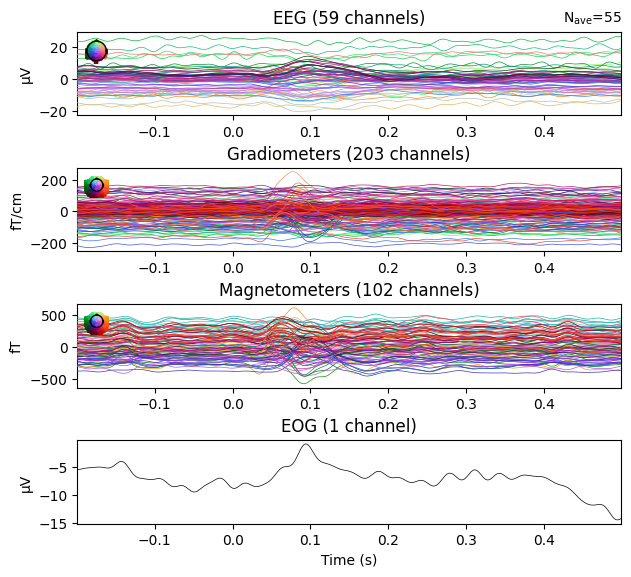

In [29]:
evokeds_list[0].plot();

La fonction [Evoked.plot_topomap()](https://mne.tools/stable/generated/mne.Evoked.html?highlight=plot_topomap#mne.Evoked.plot_topomap) permet de créer une carte topographique directement.

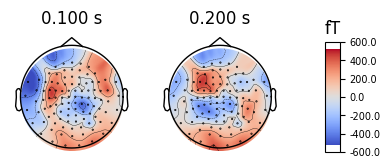

In [30]:
# Afficher la carte topographique du premier Evoked de la liste
evokeds_list[0].plot_topomap(times=[0.1, 0.2], # les temps de topo à afficher en secondes
                             ch_type='mag', # le type de capteur à afficher
                             time_unit='s', 
                             cmap='coolwarm', 
                             sensors=True,
                             sphere=0.185,
                             extrapolate='head');

In [ ]:
# Question 11: Affichez la carte topographique du premier Evoked de la liste pour les capteurs EEG. 
# pour les temps -0.1, 0.1, 0.2, 0.3, 0.4, .
# Afficher la carte topographique du premier Evoked de la liste
evokeds_list[0].plot_topomap(times=ADD CODE HERE, 
                             ch_type=ADD CODE HERE, # le type de capteur à afficher
                             time_unit='s', 
                             cmap='coolwarm', 
                             sensors=True,
                             sphere=0.09,
                             extrapolate='head');

# Conclusion
Les objets Raw, Epochs et Evoked offrent de nombreuses autres options. Dans la prochaine activité, nous verrons comment prétraiter des données MEG afin de les nettoyer en vue d'une analyse des potentiels évoqués et des oscillations.

#FIN